## Exploratory Data Analysis

In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
full_df = pd.read_csv("resources/titanic_full.csv")
full_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,...,S,1227.0,"Spector, Mr. Woolf",23.0,"London, England",Southampton,New York City,NaN,NaN,3.0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,...,C,229.0,"and maid, Doña Fermina Oliva y Ocana",39.0,"Madrid, Spain",Cherbourg,"New York, New York, US",8,NaN,1.0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,...,S,1169.0,"Sæther, Mr. Simon Sivertsen",43.0,"Skaun, Sør-Trøndelag, Norway",Southampton,US,NaN,32MB,3.0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,...,S,1289.0,"Ware, Mr. Frederick William",34.0,"Greenwich, London, England",Southampton,New York City,NaN,NaN,3.0


In [3]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

In [4]:
test_df = pd.read_csv("resources/test_titanic.csv")
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
# Load the training data
train_df = pd.read_csv("resources/train_titanic.csv")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
# Schema Information about the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age is null in 177 rows

In [7]:
train_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

###### Cabin column is not relevant with respect to making a prediction. Also about 75% of the cabin values are null. So removing the column

In [8]:
train_df.drop(['Cabin'], axis=1, inplace=True)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [9]:
# Statisctial Summary of the data
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


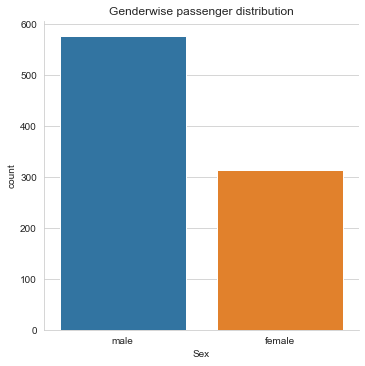

In [10]:
# Genderwise passenger distribution
sns.catplot(x='Sex', data=train_df, kind='count')
plt.title("Genderwise passenger distribution")
plt.show()

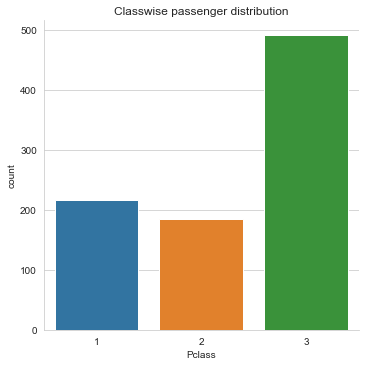

In [11]:
# Classwise passenger distribution
sns.catplot(x='Pclass', data=train_df,  kind='count')
plt.title("Classwise passenger distribution")
plt.show()

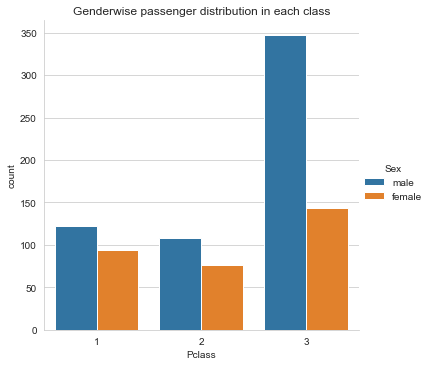

In [12]:
# Genderwise passenger distribution in each class
sns.catplot(x='Pclass', data=train_df, hue='Sex', kind='count')
plt.title("Genderwise passenger distribution in each class")
plt.show()

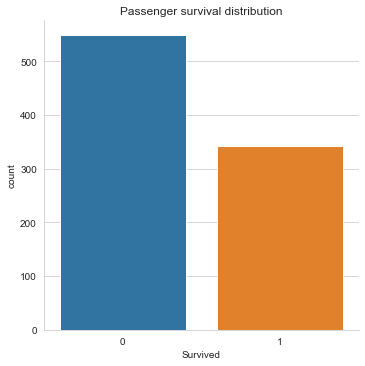

In [13]:
# Number of passengers survived vs not survived
sns.catplot(x='Survived', data=train_df,  kind='count')
plt.title("Passenger survival distribution")
plt.show()

In [14]:
def isChild(passenger):
    age, sex = passenger
    check = 'child' if age<18 else sex
    return check

train_df['Passenger'] = train_df[['Age', 'Sex']].apply(isChild, axis=1)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Passenger
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,male
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,male
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,female
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,female
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,male


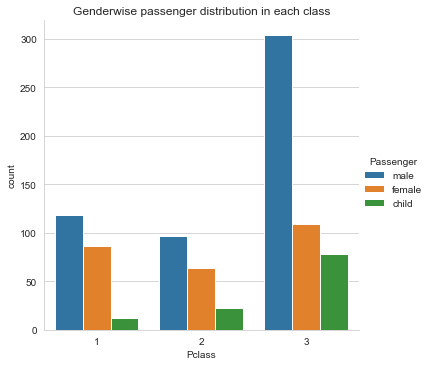

In [16]:
# Genderwise, Agewise passenger distribution in each class
sns.catplot(x='Pclass', data=train_df, hue='Passenger', kind='count')
plt.title("Genderwise passenger distribution in each class")
plt.show()

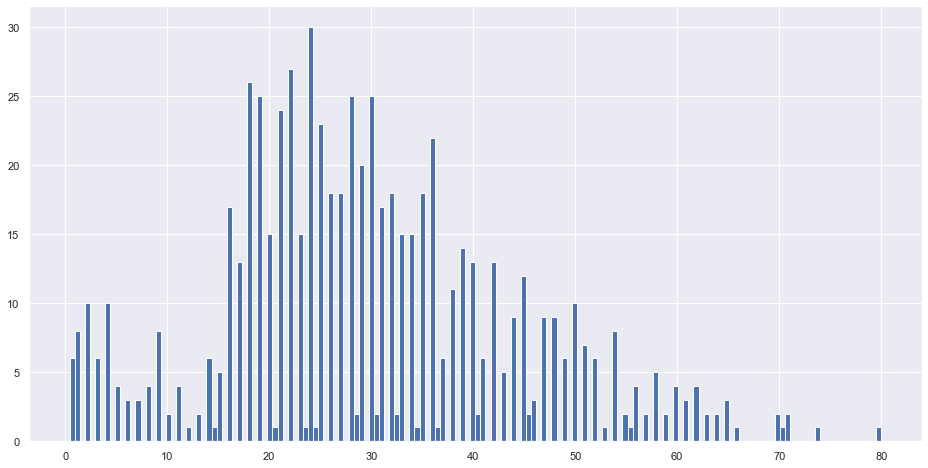

In [17]:
sns.set(rc={'figure.figsize':(16,8)})
train_df['Age'].hist(bins=160)

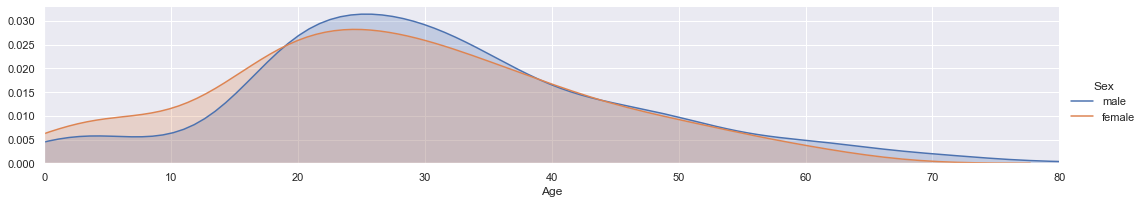

In [18]:
ax = sns.FacetGrid(train_df, hue='Sex', aspect=5)
ax.map(sns.kdeplot, 'Age', shade=True)
oldest = train_df['Age'].max()
ax.set(xlim=(0,oldest))
ax.add_legend()

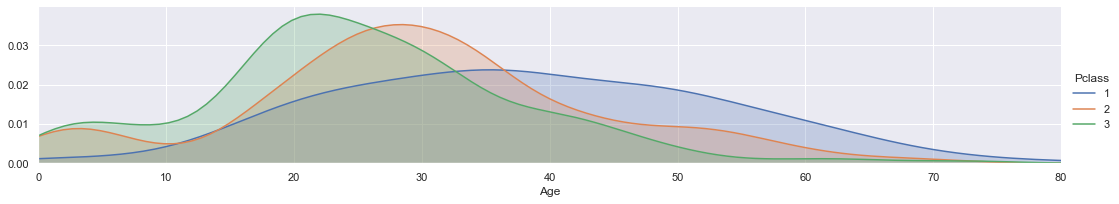

In [19]:
ax = sns.FacetGrid(train_df, hue='Pclass', aspect=5)
ax.map(sns.kdeplot, 'Age', shade=True)
oldest = train_df['Age'].max()
ax.set(xlim=(0,oldest))
ax.add_legend()

In [20]:
train_df[train_df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Passenger
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,male
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S,male
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C,female
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C,male
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q,female
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C,male
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S,female
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S,male
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S,male


In [21]:
female_df = train_df[(train_df['Sex']=='female') & (train_df['Age'].notnull()) & (train_df['Age']>=16)]
female_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Passenger
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,female
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,female
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S,female
...,...,...,...,...,...,...,...,...,...,...,...,...
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C,female
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,S,female
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,S,female
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,female


In [22]:
male_df = train_df[(train_df['Sex']=='male') & (train_df['Age']>=16)]
male_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Passenger
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,male
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,male
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,S,male
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,S,male
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,S,male
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S,male
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,male
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,male


In [23]:
child_df =  train_df[(train_df['Age'].notnull()) & (train_df['Age'] < 16)]
child_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Passenger
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,S,child
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,C,child
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,S,child
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.00,0,0,350406,7.8542,S,child
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,Q,child
...,...,...,...,...,...,...,...,...,...,...,...,...
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,S,child
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.00,4,2,347082,31.2750,S,child
852,853,0,3,"Boulos, Miss. Nourelain",female,9.00,1,1,2678,15.2458,C,child
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.00,1,1,347742,11.1333,S,child


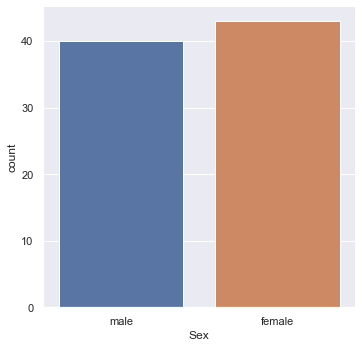

In [24]:
sns.catplot(x='Sex', data=child_df, kind='count')

In [25]:
# Average age of the female adult passengers
female_age = int(female_df['Age'].mean())
female_age

32

In [26]:
# Average age of the male adult passengers
male_age = int(male_df['Age'].mean())
male_age

33

In [27]:
# Average age of the child passengers
child_age = int(child_df['Age'].mean())
child_age

6

### Impute Missing Values for 'Age' column

In [28]:
# Impute adult male age null values with average male age
for i, row in train_df.iterrows():
    if (pd.isnull(row['Age']) and row['Name'].find('Mr. ')>=0):
        train_df.at[i,'Age'] = male_age
        print (row['Name'], row['Age'])

Moran, Mr. James nan
Williams, Mr. Charles Eugene nan
Emir, Mr. Farred Chehab nan
Todoroff, Mr. Lalio nan
Mamee, Mr. Hanna nan
Kraeff, Mr. Theodor nan
Rogers, Mr. William John nan
Lennon, Mr. Denis nan
Samaan, Mr. Youssef nan
Woolner, Mr. Hugh nan
Stewart, Mr. Albert A nan
Staneff, Mr. Ivan nan
Moutal, Mr. Rahamin Haim nan
Slocovski, Mr. Selman Francis nan
Shorney, Mr. Charles Joseph nan
Petroff, Mr. Pastcho ("Pentcho") nan
Moss, Mr. Albert Johan nan
Moore, Mr. Leonard Charles nan
McMahon, Mr. Martin nan
Olsen, Mr. Ole Martin nan
Smiljanic, Mr. Mile nan
Baumann, Mr. John D nan
Pernot, Mr. Rene nan
Rood, Mr. Hugh Roscoe nan
Mernagh, Mr. Robert nan
Sage, Mr. Frederick nan
Kiernan, Mr. Philip nan
Nenkoff, Mr. Christo nan
Reed, Mr. James George nan
Smith, Mr. Thomas nan
Cairns, Mr. Alexander nan
Parkes, Mr. Francis "Frank" nan
Smith, Mr. Richard William nan
Lewy, Mr. Ervin G nan
Saalfeld, Mr. Adolphe nan
McCoy, Mr. Bernard nan
Williams, Mr. Howard Hugh "Harry" nan
Sage, Mr. George John Jr 

In [29]:
# Impute adult female age null values with average female age        
for i, row in train_df.iterrows():
    if (pd.isnull(row['Age']) and row['Name'].find('Mrs. ')>=0):
        train_df.at[i,'Age'] = female_age
        print (row['Name'], row['Age'])

Masselmani, Mrs. Fatima nan
Spencer, Mrs. William Augustus (Marie Eugenie) nan
Boulos, Mrs. Joseph (Sultana) nan
Chibnall, Mrs. (Edith Martha Bowerman) nan
O'Brien, Mrs. Thomas (Johanna "Hannah" Godfrey) nan
Thorne, Mrs. Gertrude Maybelle nan
Frauenthal, Mrs. Henry William (Clara Heinsheimer) nan
Davison, Mrs. Thomas Henry (Mary E Finck) nan
Moussa, Mrs. (Mantoura Boulos) nan
Meyer, Mrs. Edgar Joseph (Leila Saks) nan
Meek, Mrs. Thomas (Annie Louise Rowley) nan
Thorneycroft, Mrs. Percival (Florence Kate White) nan
Kenyon, Mrs. Frederick R (Marion) nan
Peter, Mrs. Catherine (Catherine Rizk) nan
Caram, Mrs. Joseph (Maria Elias) nan
Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright) nan
Goldenberg, Mrs. Samuel L (Edwiga Grabowska) nan


In [30]:
# Impute the remaining (child) age null values with average child age
train_df['Age'] = train_df['Age'].fillna(child_age)

In [31]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Passenger
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,male
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,male
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,female
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,6.0,1,2,W./C. 6607,23.4500,S,female
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,male


In [32]:
train_df[train_df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Passenger


In [33]:
# Majority of the passengers boarded from Southampton, the starting point. So imputing the null values for embraked with S
train_df['Embarked'] = train_df['Embarked'].fillna('S')

In [34]:
train_df.isnull().values.any()

False

In [35]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.093345,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.004167,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


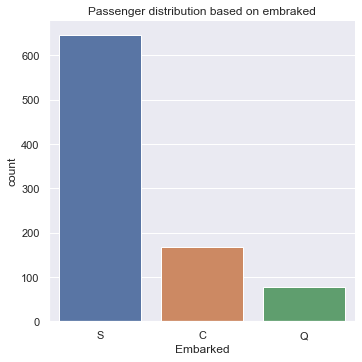

In [36]:
# Passenger distribution based on embraked feature
sns.catplot(x='Embarked', data=train_df, kind='count')
plt.title("Passenger distribution based on embraked")
plt.show()

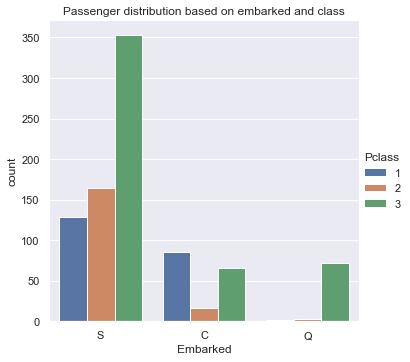

In [37]:
# Passenger distribution based on embraked and class features
sns.catplot(x='Embarked', data=train_df, hue='Pclass', kind='count')
plt.title("Passenger distribution based on embarked and class")
plt.show()

In [42]:
train_df['Family'] =''
train_df['Family'].loc[train_df['Parch']+train_df['SibSp']==0] = 'Alone'
train_df['Family'].loc[train_df['Parch']+train_df['SibSp']>0] = 'With Family'
train_df

C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Passenger,Alone,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,male,With Family,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,female,With Family,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,female,Alone,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,female,With Family,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,male,Alone,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,male,Alone,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,female,Alone,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,6.0,1,2,W./C. 6607,23.4500,S,female,With Family,With Family
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,male,Alone,Alone


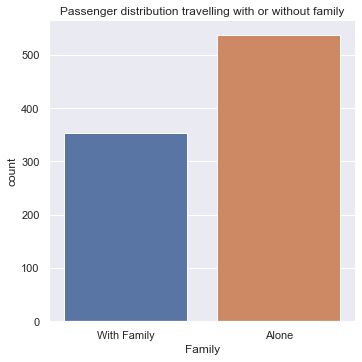

In [43]:
# Passenger distribution with or without family
sns.catplot(x='Family', data=train_df, kind='count')
plt.title("Passenger distribution travelling with or without family")
plt.show()

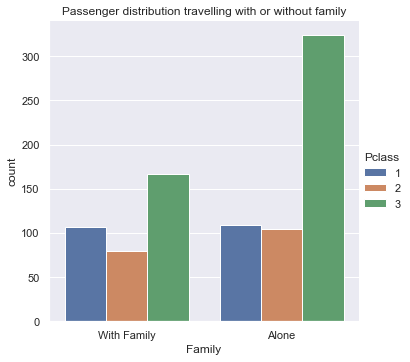

In [44]:
# Passenger distribution with or without family
sns.catplot(x='Family', data=train_df, hue='Pclass', kind='count')
plt.title("Passenger distribution travelling with or without family")
plt.show()

In [45]:
train_df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Passenger', 'Alone', 'Family'],
      dtype='object')

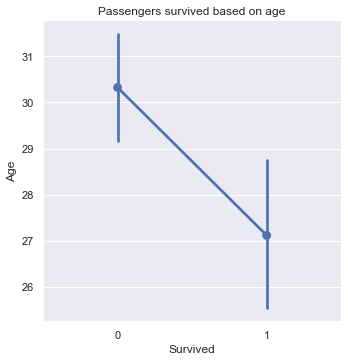

In [52]:
# Passenger distribution survived based on age
sns.catplot(x='Survived', y='Age', data=train_df, kind='point')
plt.title("Passengers survived based on age")
plt.show()

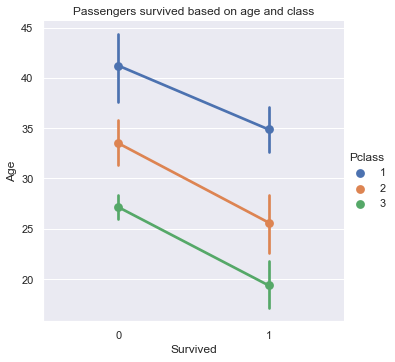

In [53]:
# Passenger distribution survived based on age and class
sns.catplot(x='Survived', y='Age', hue='Pclass', data=train_df, kind='point')
plt.title("Passengers survived based on age and class")
plt.show()

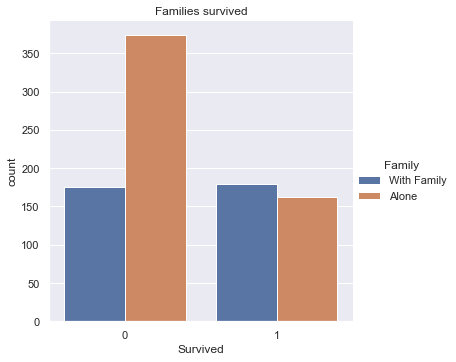

In [56]:
# Families survived
sns.catplot(x='Survived', hue='Family', data=train_df, kind='count')
plt.title("Families survived")
plt.show()

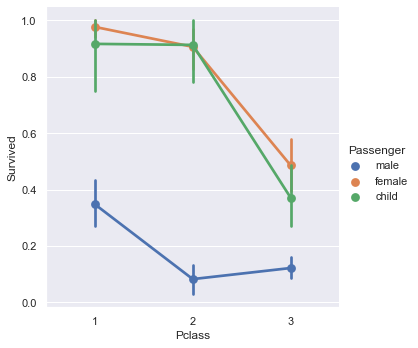

In [91]:
sns.catplot(x="Pclass", y="Survived", hue="Passenger", data=train_df, kind='point') 

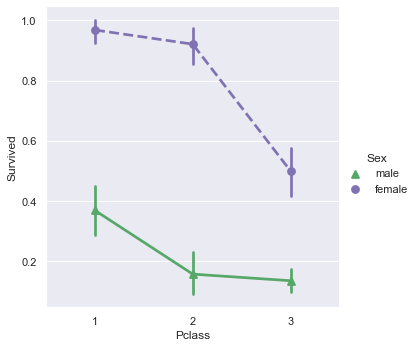

In [59]:
sns.catplot(x="Pclass", y="Survived", hue="Sex", palette={"male": "g", "female": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=train_df)
plt.plot()

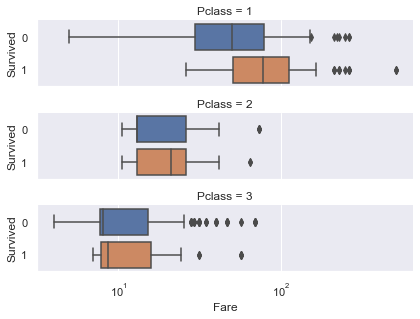

In [72]:
# BoxPlot
g = sns.catplot(x="Fare", y="Survived", row="Pclass",
                kind="box", orient="h", height=1.5, aspect=4,
                data=train_df.query("Fare > 0"))
g.set(xscale="log")
plt.show()

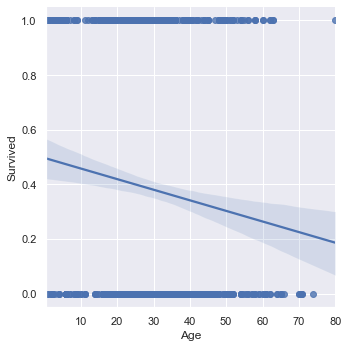

In [74]:
sns.lmplot(x='Age', y='Survived', data=train_df)

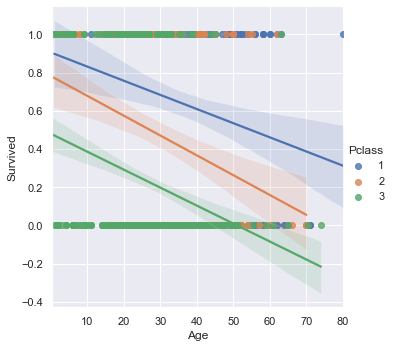

In [75]:
sns.lmplot(x='Age', y='Survived', data=train_df, hue='Pclass')

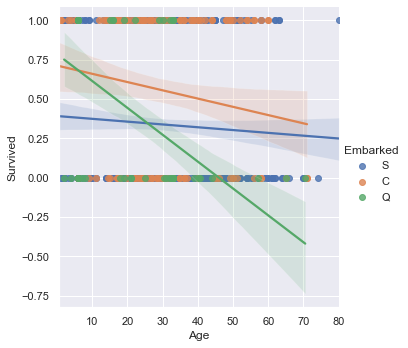

In [77]:
sns.lmplot(x='Age', y='Survived', data=train_df, hue='Embarked')

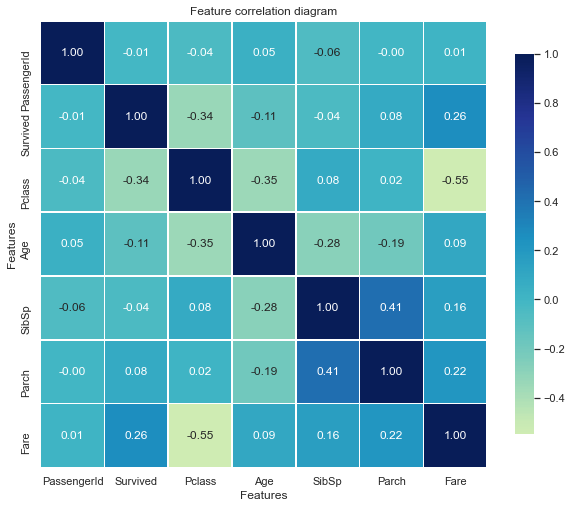

In [81]:
import seaborn as sns
def correlation_heatmap(dfname):
    correlations = dfname.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.title("Feature correlation diagram")
    plt.xlabel("Features")
    plt.ylabel("Features")
#     plt.savefig("../static/images/correlation.jpg",  bbox_inches='tight')
    plt.show();

correlation_heatmap(train_df)

Parents with children and Siblings & Spouses are correlated . Other features are not correlated

### Next Step: Transform the data for machine learning

In [88]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Passenger,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,male,Alone


Categorical data which needs to be converted to numeric:
 - Name, Sex, Ticket, Embarked, 'Passenger', 'Family'

In [93]:
train_df = pd.get_dummies(train_df, columns=["Embarked"])
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Passenger,Family,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,male,With Family,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,female,With Family,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,female,Alone,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,female,With Family,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,male,Alone,0,0,1


In [94]:
train_df = pd.get_dummies(train_df, columns=["Family"])
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Passenger,Embarked_C,Embarked_Q,Embarked_S,Family_Alone,Family_With Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,male,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,female,1,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,female,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,female,0,0,1,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,male,0,0,1,1,0


In [95]:
train_df = pd.get_dummies(train_df, columns=["Sex"])
train_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Passenger,Embarked_C,Embarked_Q,Embarked_S,Family_Alone,Family_With Family,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,male,0,0,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,female,1,0,0,0,1,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,female,0,0,1,1,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,female,0,0,1,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,male,0,0,1,1,0,0,1


In [109]:
# Drop Name and Ticket columns
train_df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
train_df

KeyError: "['Name' 'Ticket'] not found in axis"

In [99]:
train_df['Age'] = train_df['Age'].astype(int)
train_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Passenger,Embarked_C,Embarked_Q,Embarked_S,Family_Alone,Family_With Family,Sex_female,Sex_male
0,1,0,3,22,1,0,7.2500,male,0,0,1,0,1,0,1
1,2,1,1,38,1,0,71.2833,female,1,0,0,0,1,1,0
2,3,1,3,26,0,0,7.9250,female,0,0,1,1,0,1,0
3,4,1,1,35,1,0,53.1000,female,0,0,1,0,1,1,0
4,5,0,3,35,0,0,8.0500,male,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27,0,0,13.0000,male,0,0,1,1,0,0,1
887,888,1,1,19,0,0,30.0000,female,0,0,1,1,0,1,0
888,889,0,3,6,1,2,23.4500,female,0,0,1,0,1,1,0
889,890,1,1,26,0,0,30.0000,male,1,0,0,1,0,0,1


In [102]:
import math
train_df['Age'] = train_df['Age'].astype(int)
train_df['Fare'] = train_df['Fare'].apply(math.ceil)
train_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Passenger,Embarked_C,Embarked_Q,Embarked_S,Family_Alone,Family_With Family,Sex_female,Sex_male
0,1,0,3,22,1,0,8,male,0,0,1,0,1,0,1
1,2,1,1,38,1,0,72,female,1,0,0,0,1,1,0
2,3,1,3,26,0,0,8,female,0,0,1,1,0,1,0
3,4,1,1,35,1,0,54,female,0,0,1,0,1,1,0
4,5,0,3,35,0,0,9,male,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27,0,0,13,male,0,0,1,1,0,0,1
887,888,1,1,19,0,0,30,female,0,0,1,1,0,1,0
888,889,0,3,6,1,2,24,female,0,0,1,0,1,1,0
889,890,1,1,26,0,0,30,male,1,0,0,1,0,0,1


In [108]:
train_df.rename(columns={'Embarked_C':'C', 'Embarked_Q':'Q', 'Embarked_S':'S', 
                         'Sex_female':'Female', 'Sex_male':'Male', 
                          'Family_Alone':'Alone', 'Family_With Family':'Family'}, inplace=True)
train_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Passenger,C,Q,S,Alone,Family,Female,Male
0,1,0,3,22,1,0,8,male,0,0,1,0,1,0,1
1,2,1,1,38,1,0,72,female,1,0,0,0,1,1,0
2,3,1,3,26,0,0,8,female,0,0,1,1,0,1,0
3,4,1,1,35,1,0,54,female,0,0,1,0,1,1,0
4,5,0,3,35,0,0,9,male,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27,0,0,13,male,0,0,1,1,0,0,1
887,888,1,1,19,0,0,30,female,0,0,1,1,0,1,0
888,889,0,3,6,1,2,24,female,0,0,1,0,1,1,0
889,890,1,1,26,0,0,30,male,1,0,0,1,0,0,1
